In [ ]:
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
import yfinance as yf

df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
df

/tmp/ipython-input-70-2845069835.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2012-01-03,12.359184,12.397354,12.292164,12.304186,302220800
2012-01-04,12.425601,12.462869,12.300576,12.322215,260022000
2012-01-05,12.563554,12.579182,12.402463,12.470987,271269600
2012-01-06,12.694888,12.705407,12.599316,12.615846,318292800
2012-01-09,12.674752,12.855679,12.663331,12.788057,394024400
...,...,...,...,...,...
2019-12-10,64.915070,65.299511,64.281581,64.944083,90420400
2019-12-11,65.468765,65.548559,64.919911,64.994864,78756800


In [ ]:
#to get the number of rows and colums
df.shape

(2002, 5)

Text(0, 0.5, 'Close Price USD ($)')

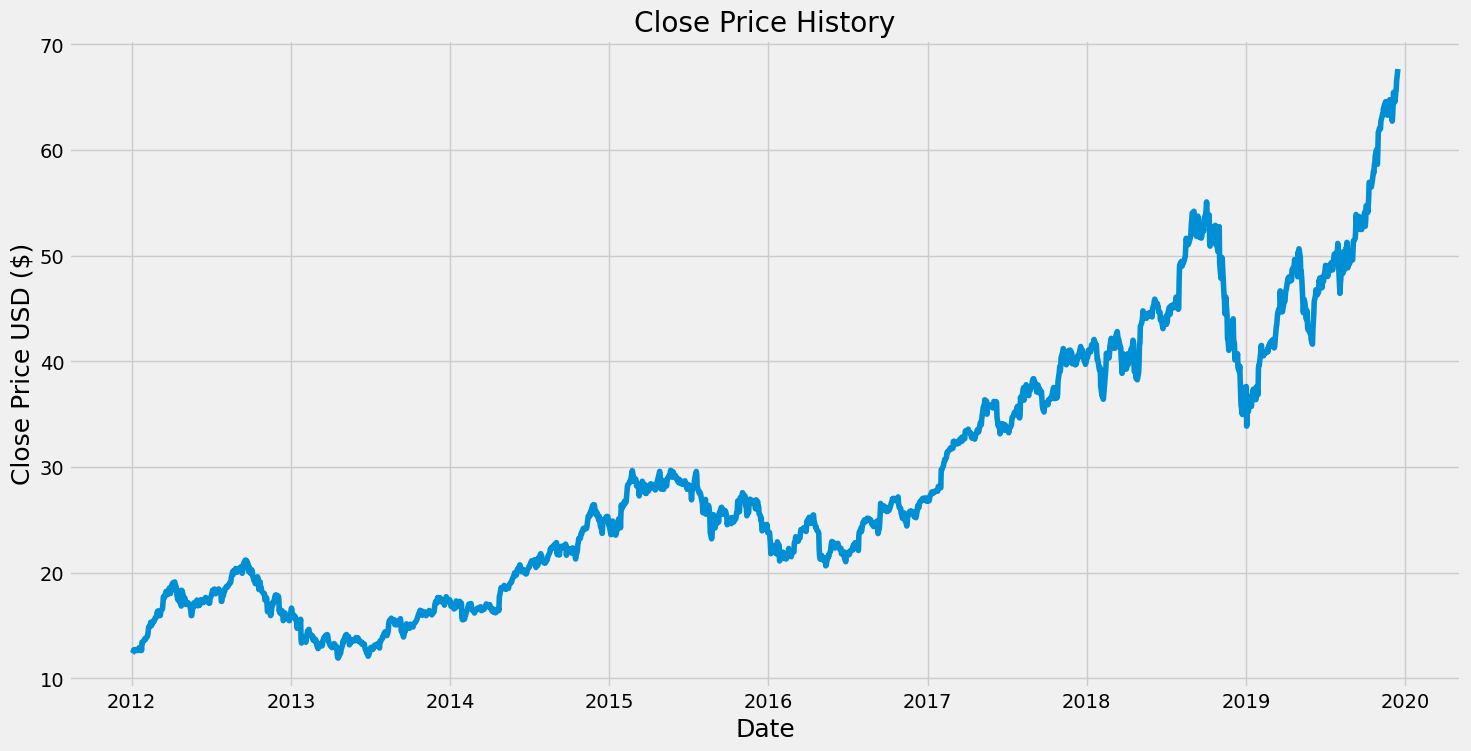

In [ ]:
#visulalize the colsing prize history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)


In [ ]:
from os import close
#create a new dataframe with only the 'Close' column
#data = df.filter(['Close'])
data = df[['Close']]  # Double brackets to keep it as 2D
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train the model on
traning_data=math.ceil(len(dataset)*0.8)
traning_data

1602

In [ ]:
#scale the dataset
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.0080507 ],
       [0.0092419 ],
       [0.01171611],
       ...,
       [0.96357325],
       [0.97957524],
       [1.        ]])

In [ ]:
#create the traning data set
#create the scaled training data set
train_data=scaled_data[0:traning_data,:]
#split the data into x and y sets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print(     )

[array([0.0080507 , 0.0092419 , 0.01171611, 0.01407161, 0.01371047,
       0.01452443, 0.01415252, 0.01352725, 0.01267549, 0.01531144,
       0.01768855, 0.01695534, 0.01293965, 0.01677218, 0.012999  ,
       0.02714844, 0.02605422, 0.02748261, 0.03057122, 0.03244165,
       0.03228532, 0.03170863, 0.03416655, 0.03647899, 0.03909867,
       0.04332999, 0.05221857, 0.05235335, 0.05730158, 0.06099938,
       0.05464418, 0.05709133, 0.05704296, 0.06390474, 0.06292899,
       0.06473471, 0.06797987, 0.06978554, 0.07498707, 0.07877657,
       0.07987073, 0.08025342, 0.07377444, 0.07221115, 0.07244299,
       0.07853389, 0.08024815, 0.08392962, 0.09260795, 0.10418635,
       0.1020194 , 0.10202464, 0.11039587, 0.11301554, 0.11115052,
       0.1094473 , 0.10767379, 0.11356531, 0.11760802, 0.11930056])]
[np.float64(0.11511776281087938)]



In [ ]:
#convert x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train  ,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#complile the model
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 46s 27ms/step - loss: 0.0017


In [ ]:
#creating the testing data set
#creating the new array containing scaled values from index 1543 to 2003
test_data=scaled_data[traning_data-60:,:]
#create the datasets x_test and y_test
x_test=[]
y_test=dataset[traning_data:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data into numpy array
x_test =np.array(x_test)

In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [ ]:
#get the models predicted price values
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


In [ ]:
#get the rootmean square  errors (RMSE)
rmse=np.sqrt(  np.mean(predictions-y_test)**2)
rmse

np.float64(0.2603420543670654)

/tmp/ipython-input-86-3950622847.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


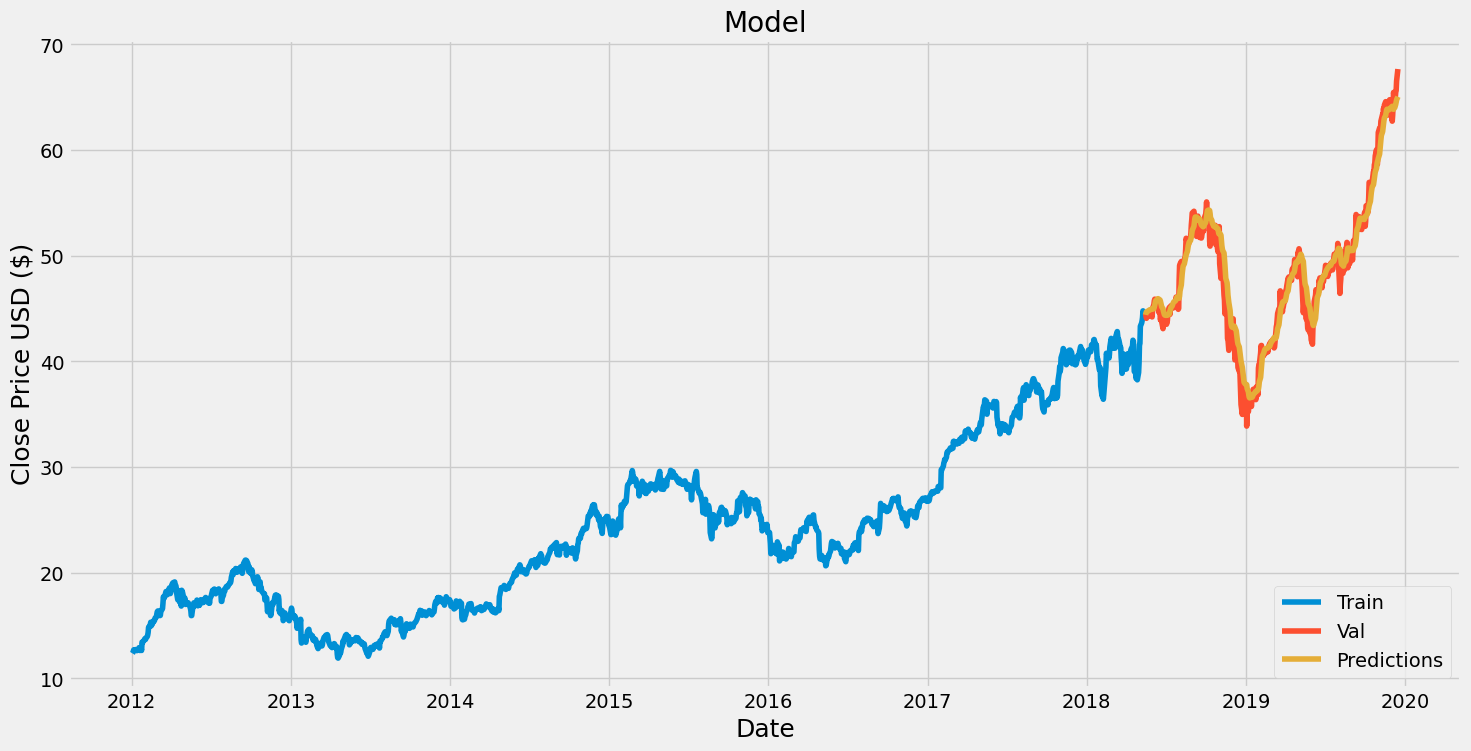

In [ ]:
from re import L
#plot the data
train=data[:traning_data]
valid=data[traning_data:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#show the valid and predicted prices
valid

Price,Close,Predictions
Ticker,AAPL,
Date,,
2018-05-16,44.514053,44.397285
2018-05-17,44.232559,44.585758
2018-05-18,44.071697,44.694748
2018-05-21,44.383953,44.735985
2018-05-22,44.272778,44.774536
...,...,...
2019-12-10,64.915070,64.170937
2019-12-11,65.468765,64.323143


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Download data
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
new_df = apple_quote[['Close']]  # safer column selection

# Fit scaler on some training data (here just an example slice)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(new_df[:-60])  # fit on all but the last 60 days

# Get and reshape the last 60 days
last_60_days = new_df[-60:].values
print("Shape of last_60_days before scaling:", last_60_days.shape)  # Should be (60, 1)

# Scale
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test=[]
#append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to the numpy arrays
X_test =np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

/tmp/ipython-input-88-1280379764.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')
[*********************100%***********************]  1 of 1 completed

Shape of last_60_days before scaling: (60, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
[[64.12854]]


In [ ]:
import yfinance as yf
apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])


/tmp/ipython-input-89-1770225685.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_quote2 = yf.download('AAPL', start='2019-12-18', end='2019-12-19')  # Note: end date is exclusive
[*********************100%***********************]  1 of 1 completed

Ticker           AAPL
Date                 
2019-12-18  67.637596
